In [74]:
import pandas as pd
from PIL import Image
import random
import albumentations as A
import numpy as np

In [75]:
prompt_df = pd.read_csv('prompt_results_for_chips.csv')
prompt_adv_df = pd.read_csv('prompt_results_for_chips_adv_a.csv')

display(prompt_df.head())

display(prompt_adv_df.head())

image_id   image_file                                         image_path  \
0         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
1         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
2         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
3         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
4         2  P0003_1.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   

                 prompt                                     generated_text  1  \
0          A picture of     a parking lot with several yellow school buses  0   
1            A photo of     a parking lot with several yellow school buses  0   
2             There are  several yellow school buses parked in a parkin...  0   
3  The image quality is  poor, but the image shows a parking lot with s...  0   
4          A picture of             a parking lot with yellow school buses  0   

    2  3  4  5  ...  7  8  9  10  11  12  13  14  15  16  
0  13  0  0  0  ...  0  0  0   0   0   0   0   0   0   0  
1  13  0  0  0  ...  0  0  0   0   0   0   0   0   0   0  
2  13  0  0  0  ...  0  0  0   0   0   0   0   0   0   0  
3  13  0  0  0  ...  0  0  0   0   0   0   0   0   0   0  
4   9  0  0  0  ...  0  0  0   0   0   0   0   0   0   0  

[5 rows x 21 columns]

image_id   image_file                                         image_path  \
0         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
1         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
2         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
3         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
4         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   

         prompt                                  generated_text augmentation  \
0  A picture of          a parking lot with yellow school buses     rotation   
1  A picture of  a parking lot with several yellow school buses         blur   
2  A picture of  a parking lot with several yellow school buses   drop_pixel   
3    A photo of          a parking lot with yellow school buses     rotation   
4    A photo of  a parking lot with several yellow school buses         blur   

   1   2  3  4  ...  7  8  9  10  11  12  13  14  15  16  
0  0  13  0  0  ...  0  0  0   0   0   0   0   0   0   0  
1  0  13  0  0  ...  0  0  0   0   0   0   0   0   0   0  
2  0  13  0  0  ...  0  0  0   0   0   0   0   0   0   0  
3  0  13  0  0  ...  0  0  0   0   0   0   0   0   0   0  
4  0  13  0  0  ...  0  0  0   0   0   0   0   0   0   0  

[5 rows x 22 columns]

In [76]:
# Merge the two DataFrames on 'id' and 'prompt'
merged_df = pd.merge(prompt_df, prompt_adv_df, on=['image_id', 'prompt'], suffixes=('_base', '_adv'))

def percent_word_change(text_a, text_b):
    words_a = set(text_a.split())
    words_b = set(text_b.split())
    
    # Find the number of different words
    diff_words = words_a.symmetric_difference(words_b)
    total_words = len(words_a.union(words_b))  # Total unique words in both sentences
    
    if total_words == 0:  # Avoid division by zero
        return 0
    
    # Calculate percentage of word change
    return len(diff_words) / total_words * 100

# Calculate the percent word change between the generated_text columns
merged_df['percent_word_change'] = merged_df.apply(
    lambda row: percent_word_change(row['generated_text_base'], row['generated_text_adv']), axis=1
)

display(merged_df[['image_id','augmentation','prompt','generated_text_base','generated_text_adv','percent_word_change']].head())
# Group by both 'prompt' and 'augmentation'
grouped = merged_df.groupby(['prompt', 'augmentation'])['percent_word_change'].mean()


# Display the result
print(grouped)

image_id augmentation        prompt  \
0         1     rotation  A picture of   
1         1         blur  A picture of   
2         1   drop_pixel  A picture of   
3         1     rotation    A photo of   
4         1         blur    A photo of   

                              generated_text_base  \
0  a parking lot with several yellow school buses   
1  a parking lot with several yellow school buses   
2  a parking lot with several yellow school buses   
3  a parking lot with several yellow school buses   
4  a parking lot with several yellow school buses   

                               generated_text_adv  percent_word_change  
0          a parking lot with yellow school buses                 12.5  
1  a parking lot with several yellow school buses                  0.0  
2  a parking lot with several yellow school buses                  0.0  
3          a parking lot with yellow school buses                 12.5  
4  a parking lot with several yellow school buses                  0.0

prompt                augmentation
A photo of            blur            35.039492
                      drop_pixel      20.686272
                      rotation        48.966256
A picture of          blur            29.665474
                      drop_pixel      15.809335
                      rotation        45.268266
The image quality is  blur            36.321063
                      drop_pixel      25.275172
                      rotation        46.389768
Name: percent_word_change, dtype: float64


In [77]:
#The ViT models were pre-trained on the ImageNet and ImageNet-21k datasets.

In [78]:
img_q = merged_df[merged_df['prompt']=='The image quality is']
#display(img_q[['image_id','augmentation','prompt','generated_text_base','generated_text_adv','percent_word_change']].head(25))
img_q_r = img_q[img_q['augmentation']=='rotation']
#display(img_q_r[['image_id','augmentation','prompt','generated_text_base','generated_text_adv','percent_word_change']].head(25))

In [79]:
img_pic_of = merged_df[merged_df['prompt']=='A picture of']
#display(img_pic_of[['image_id','augmentation','prompt','generated_text_base','generated_text_adv','percent_word_change']].head(25))
img_pic_of_r = img_pic_of[img_pic_of['augmentation']=='rotation']
img_pic_of_dr = img_pic_of[img_pic_of['augmentation']=='drop_pixel']
img_pic_of_b = img_pic_of[img_pic_of['augmentation']=='blur']
#display(img_pic_of_r[['image_id','augmentation','prompt','generated_text_base','generated_text_adv','percent_word_change']].head(25))

In [80]:
img_pic_of_r.columns

Index(['image_id', 'image_file_base', 'image_path_base', 'prompt',
       'generated_text_base', '1_base', '2_base', '3_base', '4_base', '5_base',
       '6_base', '7_base', '8_base', '9_base', '10_base', '11_base', '12_base',
       '13_base', '14_base', '15_base', '16_base', 'image_file_adv',
       'image_path_adv', 'generated_text_adv', 'augmentation', '1_adv',
       '2_adv', '3_adv', '4_adv', '5_adv', '6_adv', '7_adv', '8_adv', '9_adv',
       '10_adv', '11_adv', '12_adv', '13_adv', '14_adv', '15_adv', '16_adv',
       'percent_word_change'],
      dtype='object')

In [81]:
# Define augmentation functions
def rotate_image(image, angle=45):
    transform = A.Rotate(limit=(angle, angle), p=1.0)
    return transform(image=image)['image']

def gaussian_blur_image(image, sigma=7):
    transform = A.GaussianBlur(blur_limit=(sigma, sigma), p=1.0)
    return transform(image=image)['image']

def drop_pixels(image, drop_fraction=0.001):
    height, width, _ = image.shape
    num_pixels_to_drop = int(width * height * drop_fraction)
    
    for _ in range(num_pixels_to_drop):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        image[y, x] = [0, 0, 0]  # Drop to black or any other color
    
    return image

agumentation_map = {'blur':gaussian_blur_image,
                    'drop_pixel': drop_pixels,
                    'rotation': rotate_image}

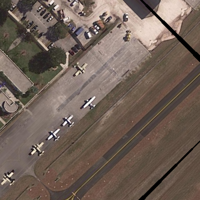

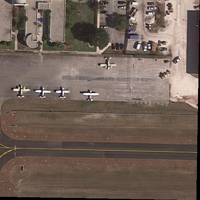

rotation
an airport with several planes parked on the runway
an airport with several planes parked on the runway
0.0


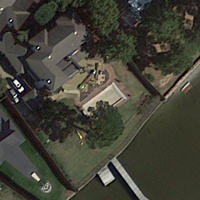

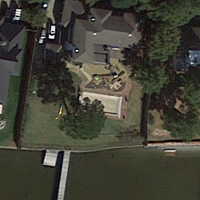

rotation
a house with a dock and a boat in the water
a house in the middle of a lake
66.66666666666666


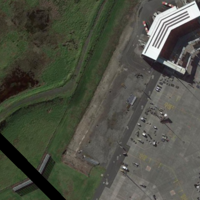

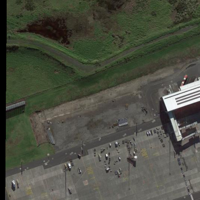

rotation
the airport from above
the airport from above
0.0


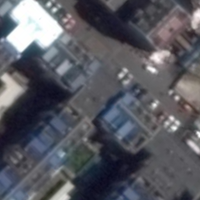

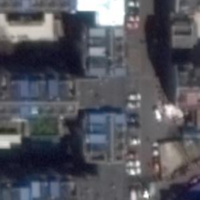

rotation
a city street with a large blue building
a city street from above
66.66666666666666


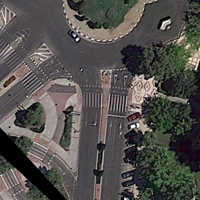

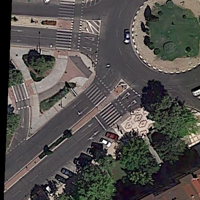

rotation
a street intersection with cars and a car
a street intersection with cars and a car
0.0


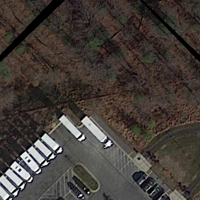

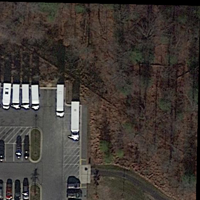

rotation
a parking lot with several trucks parked in it
a parking lot with several trucks parked in it
0.0


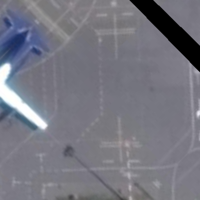

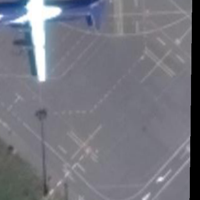

rotation
a small plane taking off from an airport
a plane that is flying over a parking lot
85.71428571428571


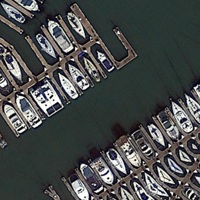

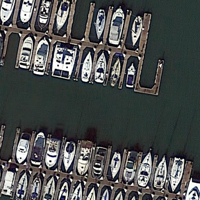

rotation
a marina with many boats docked in it
a marina with many boats docked in it
0.0


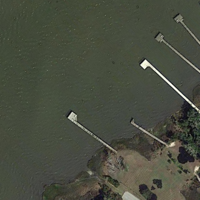

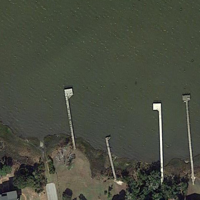

rotation
a dock in the water with a boat in the background
a dock in the water with a bridge in the background
22.22222222222222


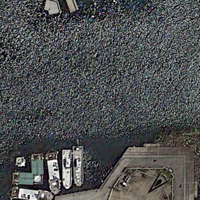

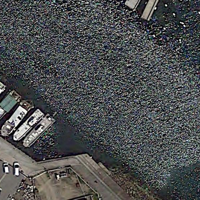

rotation
a harbor with boats in it
a harbor with boats and a dock
50.0


In [82]:

n = 10
random_rows = img_pic_of_r.sample(n=n)
for index, row in random_rows.iterrows():
    img = Image.open(row.image_path_base)
    aug_img = Image.fromarray(agumentation_map[row.augmentation](np.array(img)))
    aug_img.thumbnail((200,200))
    img.thumbnail((200,200))
    display(aug_img), display(img)
    print(row.augmentation)
    print(row.generated_text_base)
    print(row.generated_text_adv)
    print(row.percent_word_change)



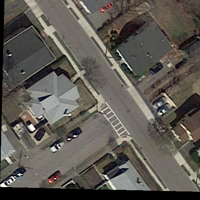

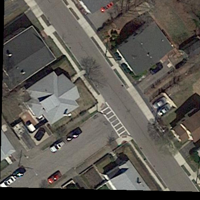

drop_pixel
a street intersection from above
a street intersection from above
0.0


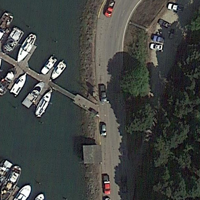

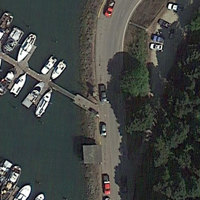

drop_pixel
a marina with boats parked on the dock
a marina with boats parked on it
33.33333333333333


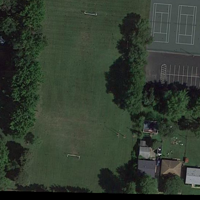

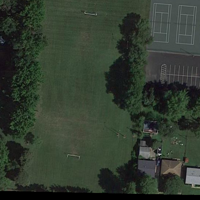

drop_pixel
a tennis court in a field
a tennis court in a field
0.0


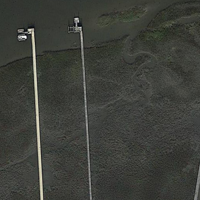

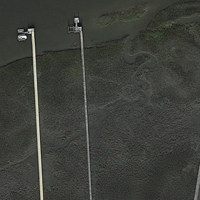

drop_pixel
a bridge that is on the water
a bridge that is on the water
0.0


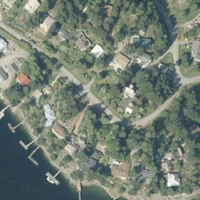

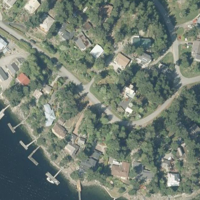

drop_pixel
a house on the water in a small town
a house on the water in a small town
0.0


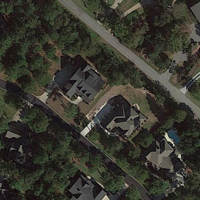

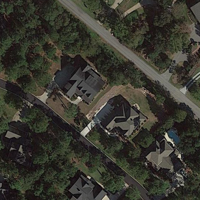

drop_pixel
a neighborhood in the suburbs of a city
a neighborhood in the suburbs of a city
0.0


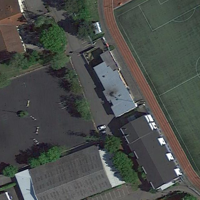

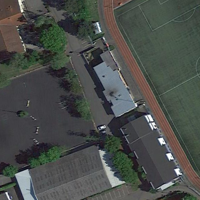

drop_pixel
a soccer field with a soccer ball and a soccer field
a soccer field with a soccer ball and a soccer field
0.0


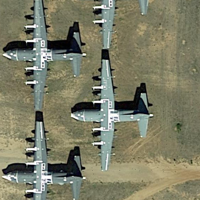

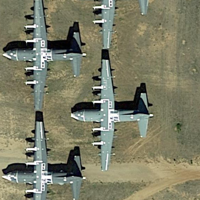

drop_pixel
four military planes parked on the ground
four military planes lined up on the ground
33.33333333333333


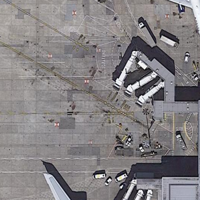

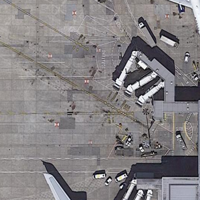

drop_pixel
an airplane with luggage on the tarmac
an airplane with luggage on the tarmac
0.0


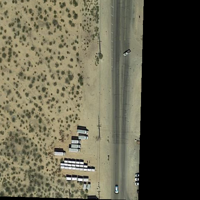

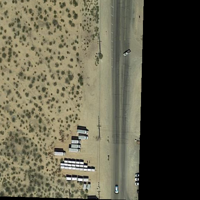

drop_pixel
a desert road with a truck and a car
a desert road with a truck and a car
0.0


In [86]:
random_rows = img_pic_of_dr.sample(n=n)
for index, row in random_rows.iterrows():
    img = Image.open(row.image_path_base).convert('RGB')
    aug_img = Image.fromarray(agumentation_map[row.augmentation](np.array(img)))
    aug_img.thumbnail((200,200))
    img.thumbnail((200,200))
    display(aug_img), display(img)
    print(row.augmentation)
    print(row.generated_text_base)
    print(row.generated_text_adv)
    print(row.percent_word_change)
 
 

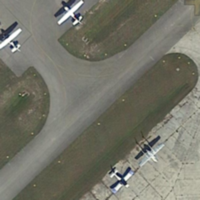

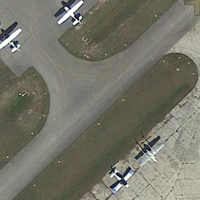

blur
a small airplane parked on the runway
the airport from above
90.0


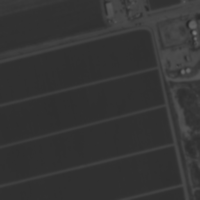

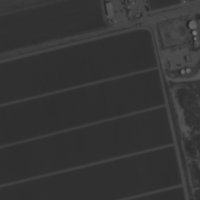

blur
a farm field with a black and white image
a farm field with a black and white image
0.0


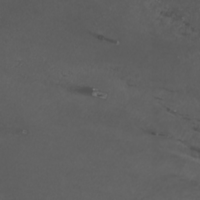

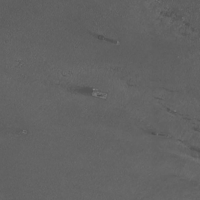

blur
a boat in the water
a plane flying over a field
88.88888888888889


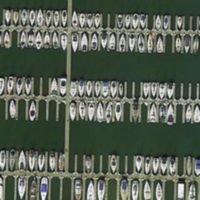

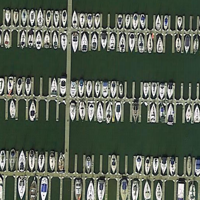

blur
a marina with many boats in it
a marina with many boats in it
0.0


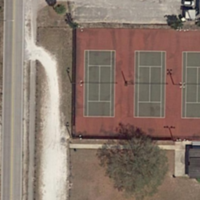

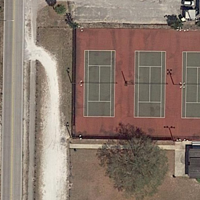

blur
a tennis court from above
a tennis court from above
0.0


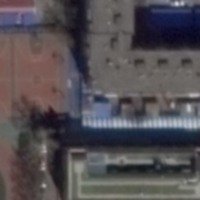

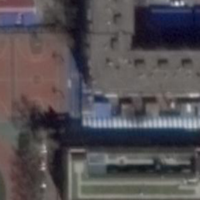

blur
a tennis court in a city
a tennis court in the middle of a city
37.5


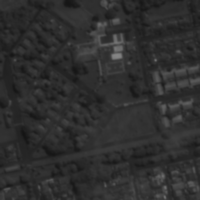

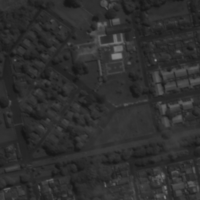

blur
a satellite image of a residential area
a satellite image of a residential area
0.0


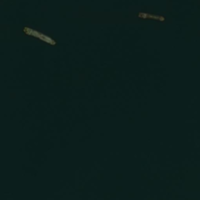

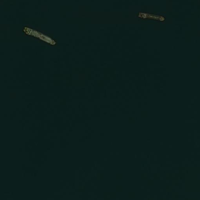

blur
two small boats floating in the water
a plane flying over the ocean
91.66666666666666


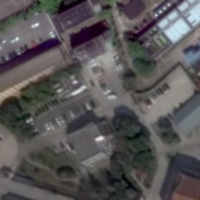

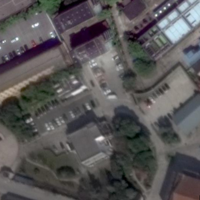

blur
a google earth satellite view of a parking lot
a satellite view of a parking lot
25.0


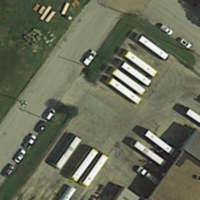

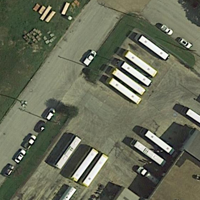

blur
a parking lot with several trucks parked in it
a parking lot with several buses parked in it
20.0


In [87]:
random_rows = img_pic_of_b.sample(n=n)
for index, row in random_rows.iterrows():
    img = Image.open(row.image_path_base).convert('RGB')
    aug_img = Image.fromarray(agumentation_map[row.augmentation](np.array(img)))
    aug_img.thumbnail((200,200))
    img.thumbnail((200,200))
    display(aug_img), display(img)
    print(row.augmentation)
    print(row.generated_text_base)
    print(row.generated_text_adv)
    print(row.percent_word_change)